<a href="https://colab.research.google.com/github/chetan-957/IBM-DataScience/blob/main/Stock_and_Revenue_Analysis_Dashboard_for_Tesla_and_GameStop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**"Stock and Revenue Analysis Dashboard for Tesla and GameStop"**

In [3]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib
!pip install lxml
!pip install plotly
!pip install yfinance
!pip install matplotlib


In [30]:
import yfinance as yf
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [5]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

#**TESLA**

###**Extracting Tesla Stock Data Using yfinance**

In [7]:
Tesla = yf.Ticker("TSLA")

In [8]:
# Extract historical stock information for the maximum available period
tesla_data = Tesla.history(period="max")

In [9]:
# Display the first few rows of the DataFrame
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


###**Extracting Tesla Revenue Data Using Webscraping**

In [10]:
# URL of the webpage to download
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

In [11]:
# Send a GET request to download the webpage
response = requests.get(url)

In [12]:
# Save the text of the response in a variable
html_data = response.text

In [13]:
# Print the first 500 characters to verify the content
print(html_data[:500])


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


In [14]:
# Parse the HTML data using BeautifulSoup with 'html.parser'
soup = BeautifulSoup(html_data, 'html.parser')

In [15]:
# Print the first 100 characters of the parsed content to verify
print(soup.prettify()[:100])

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[i


In [16]:
# Create a list to store the data
revenue_data = []

In [17]:
# Find all tables in the HTML
tables = soup.find_all('table')

In [18]:
# Iterate through the tables to find the one with 'Tesla Quarterly Revenue'
for table in tables:
    if 'Tesla Quarterly Revenue' in str(table):
        # Iterate through each row in the table body
        rows = table.find_all('tr')[1:]  # Skip the header row
        for row in rows:
            cols = row.find_all('td')
            if len(cols) == 2:  # Ensure the row has both date and revenue
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()

                # Append the row as a tuple to the list
                revenue_data.append({"Date": date, "Revenue": revenue})

In [19]:
# Convert the list of dictionaries into a DataFrame
tesla_revenue = pd.DataFrame(revenue_data)

In [20]:
# Clean the Revenue column (remove commas and dollar signs)
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)

In [21]:
# Replace empty strings with NaN and drop them
tesla_revenue['Revenue'].replace('', np.nan, inplace=True)
tesla_revenue.dropna(subset=['Revenue'], inplace=True)

In [22]:
# Convert the Revenue column to float
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(float)

In [23]:
# Display the cleaned DataFrame
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454.0
1,2022-06-30,16934.0
2,2022-03-31,18756.0
3,2021-12-31,17719.0
4,2021-09-30,13757.0


In [24]:
# Ensure the Revenue column is a string before applying string methods
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(str)

# Clean the Revenue column (remove commas and dollar signs)
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)

# Convert the Revenue column to float
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('', np.nan).astype(float)

# Display the cleaned DataFrame
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454.0
1,2022-06-30,16934.0
2,2022-03-31,18756.0
3,2021-12-31,17719.0
4,2021-09-30,13757.0


In [25]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [26]:
# Display the last 5 rows of the tesla_revenue DataFrame
tesla_revenue.tail()


,Date,Revenue
48,2010-09-30,31.0
49,2010-06-30,28.0
50,2010-03-31,21.0
52,2009-09-30,46.0
53,2009-06-30,27.0


###**Tesla Stock and Revenue Dashboard**

In [32]:
#Define the make_graph function
def make_graph(stock_data, revenue_data, company_name):
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Plot the stock price
    ax1.plot(stock_data.index, stock_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price ($)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a secondary axis to plot the revenue data
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='green', marker='o', linestyle='-', label='Revenue')
    ax2.set_ylabel('Revenue ($)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Add a title and grid
    plt.title(f'{company_name} Stock Price and Quarterly Revenue')
    fig.tight_layout()
    plt.grid(True)
    plt.show()



In [34]:
# Convert the 'Date' column to datetime format
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'], errors='coerce')

# Drop rows where the conversion to datetime failed
tesla_revenue.dropna(subset=['Date'], inplace=True)

In [35]:
# Remove timezone information from the 'Date' column
tesla_revenue['Date'] = tesla_revenue['Date'].dt.tz_localize(None)

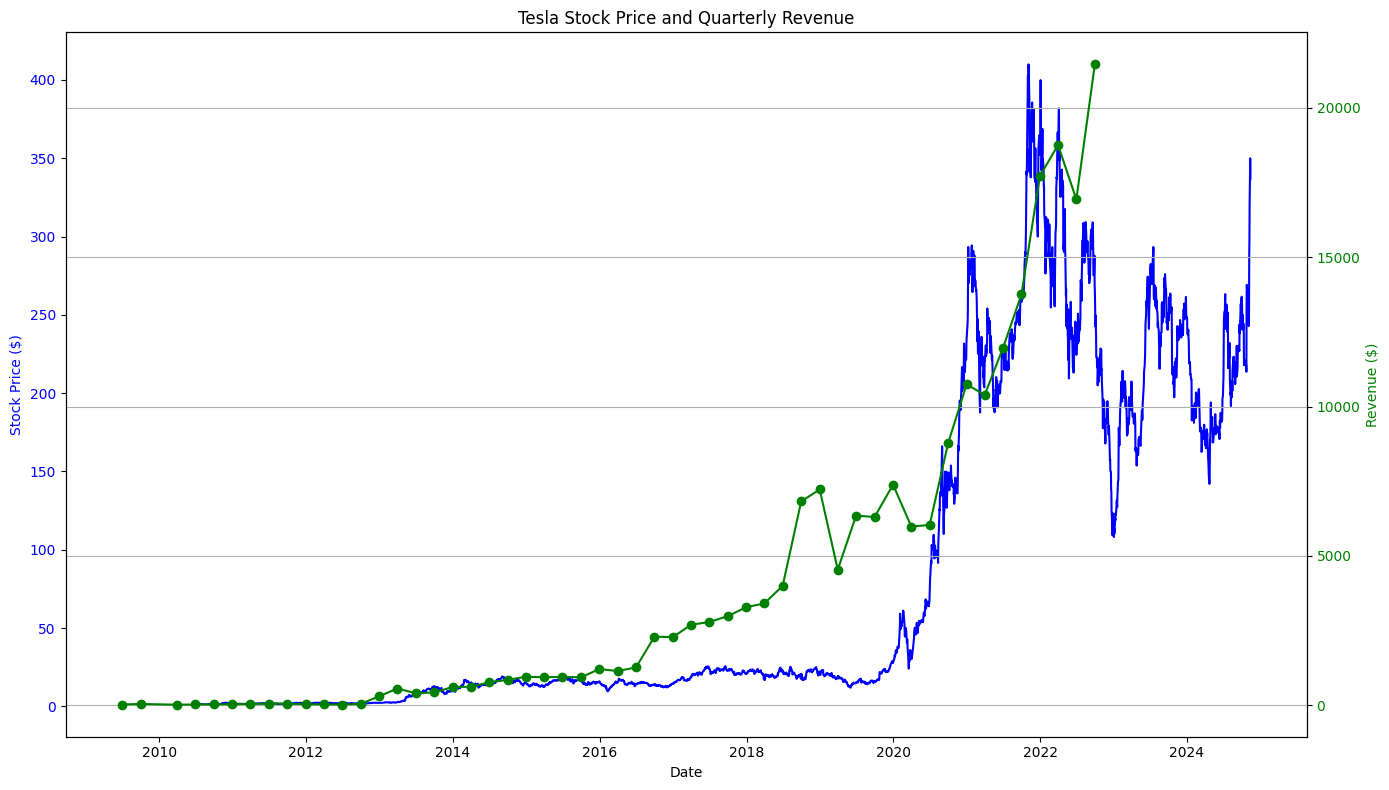

In [36]:
#Invoke the make_graph function to display the graph
make_graph(tesla_data, tesla_revenue, 'Tesla')

#**GameStop**

###**Extracting GameStop Stock Data Using yfinance**

In [37]:
GameStop = yf.Ticker("GME")

In [38]:
# Extract historical stock information for the maximum available period
gme_data = GameStop.history(period="max")

In [39]:
# Display the first few rows of the DataFrame
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


###**Extracting GameStop Revenue Data Using Webscraping**

In [40]:
# URL of the webpage to download
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

In [41]:
# Send a GET request to download the webpage
response = requests.get(url)

In [42]:
# Save the text of the response in a variable
html_data = response.text

In [43]:
# Print the first 500 characters to verify the content
print(html_data[:500])

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


In [44]:
# Parse the HTML data using BeautifulSoup with 'html.parser'
soup = BeautifulSoup(html_data, 'html.parser')

In [45]:
# Print the first 100 characters of the parsed content to verify
print(soup.prettify()[:100])

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.mac


In [46]:
# Extract all tables using pandas' read_html method
tables = pd.read_html(str(soup))

In [47]:
#Locate the second table using BeautifulSoup
table_body = soup.find_all("tbody")[1]  # Extract the second table's body

In [48]:
#Extract rows from the table
rows = table_body.find_all("tr")

In [49]:
#Extract data from each row and store it in a list
data = []
for row in rows:
    cols = row.find_all("td")
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    data.append([date, revenue])

In [52]:
#Create a DataFrame
gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

In [53]:
#Clean the data
# Remove any rows with missing values
gme_revenue.dropna(inplace=True)

In [54]:
# Remove dollar signs and commas from the 'Revenue' column and convert it to integer
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(int)


In [55]:
# Display the cleaned DataFrame
print("\nCleaned GameStop Revenue DataFrame:")
gme_revenue.head()


Cleaned GameStop Revenue DataFrame:


,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548


In [56]:
gme_revenue.tail()


,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


###**GameStop Stock and Revenue Dashboard**

In [60]:
#Define the make_graph function
def make_graph(stock_data, revenue_data, company_name):
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Plot the stock price
    ax1.plot(stock_data.index, stock_data['Close'], color='green', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price ($)', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    # Create a secondary axis to plot the revenue data
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='red', marker='o', linestyle='-', label='Revenue')
    ax2.set_ylabel('Revenue ($)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Add a title and grid
    plt.title(f'{company_name} Stock Price and Quarterly Revenue')
    fig.tight_layout()
    plt.grid(True)
    plt.show()

In [65]:
# Convert the 'Date' column to datetime format
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'], errors='coerce')

# Drop rows where the conversion to datetime failed
gme_revenue.dropna(subset=['Date'], inplace=True)

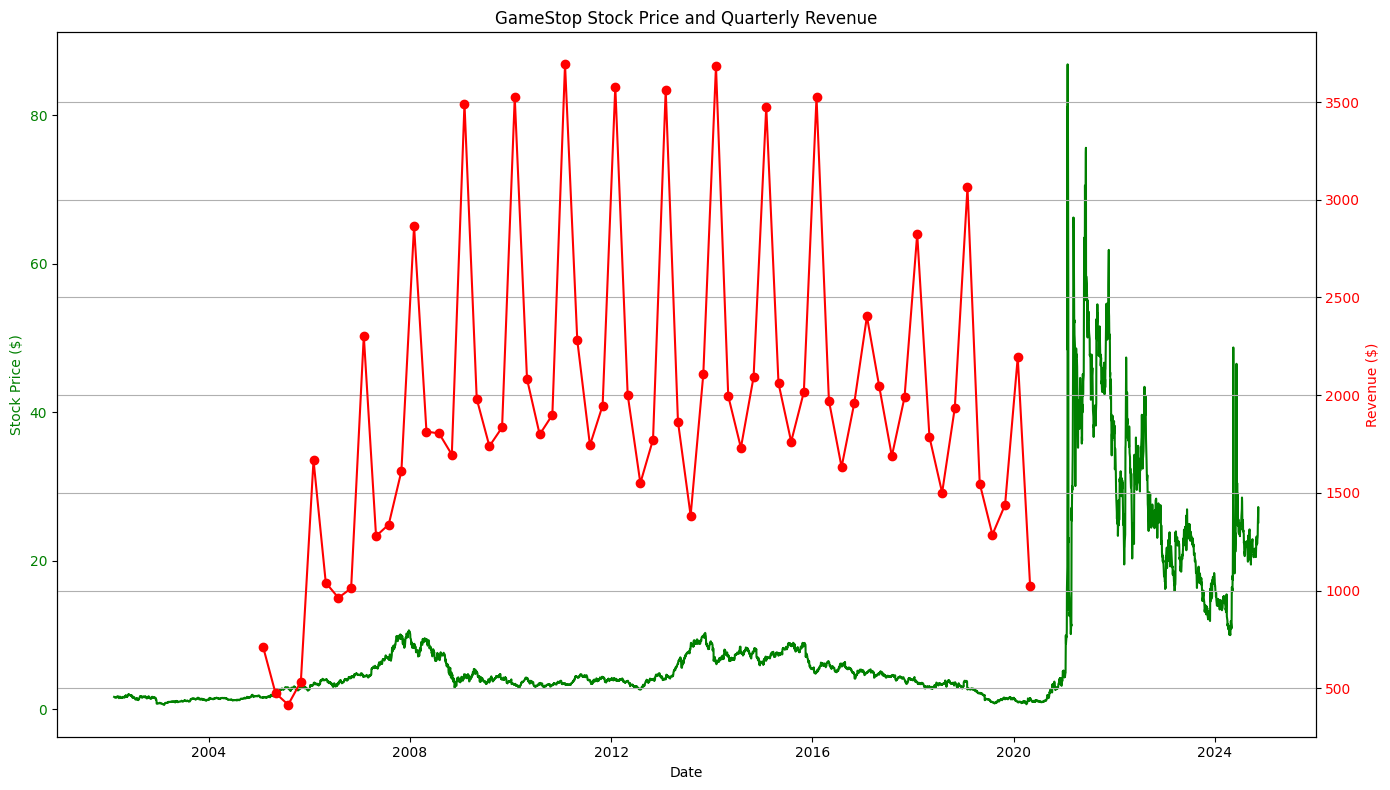

In [66]:
# Now, invoke the make_graph function to display the graph for GameStop
make_graph(gme_data, gme_revenue, 'GameStop')